In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import mysql.connector
from ultralytics import YOLO
import cvzone

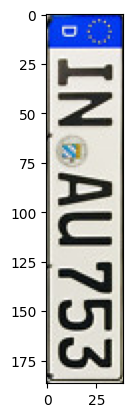

In [10]:
image = cv2.imread("license_plate.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image)

Matrícula detectada: 


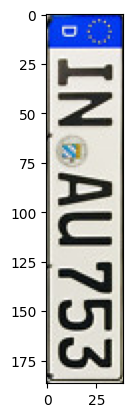

In [11]:
# crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
# gray = cv2.threshold(crop, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# OCR con configuración especial (psm 7 = una línea de texto)
text = pytesseract.image_to_string(image, config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")

print("Matrícula detectada:", text.strip())
plt.imshow(image)

In [33]:
conn = mysql.connector.connect(
            host="localhost", 
            user="parking_user",
            password="parking_user",
            database="parking_lot"
        )

In [34]:
cursor = conn.cursor()

In [37]:
cursor.execute("SELECT * FROM Car")

InternalError: Unread result found

In [38]:
resultado = cursor.fetchall()
print(resultado)

[]


In [6]:
!yolo task=detect mode=train model=yolo11s.pt data=C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/datasets_licence_plate/data.yaml epochs=50 imgsz=640 verbose=True amp=True


^C


In [ ]:
model = YOLO("yolo11n.pt")
model.train(task="detect", mode="train", data="C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/datasets_licence_plate/data.yaml", epochs=50, imgsz=640, amp=True, verbose=True)

100%|██████████| 18.4M/18.4M [00:00<00:00, 115MB/s]


New https://pypi.org/project/ultralytics/8.3.191 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/datasets_licence_plate/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False

100%|██████████| 6.25M/6.25M [00:00<00:00, 103MB/s]


AMP: checks passed 


train: Scanning C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\datasets_licence_plate\test\labels.cache... 9572 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9572/9572 [00:00<?, ?it/s]

train: WARNING  C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\datasets_licence_plate\valid\images\Image_15_png_jpg.rf.6acc089a0249714dde4cdbccc0836358.jpg: 1 duplicate labels removed
WARNING  Box and segment counts should be equal, but got len(segments) = 7320, len(boxes) = 11880. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\datasets_licence_plate\valid\labels.cache... 979 images, 0 backgrounds, 0 corrupt: 100%|██████████| 979/979 [00:00<?, ?it/s]

val: WARNING  C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\datasets_licence_plate\valid\images\Image_15_png_jpg.rf.6acc089a0249714dde4cdbccc0836358.jpg: 1 duplicate labels removed
WARNING  Box and segment counts should be equal, but got len(segments) = 864, len(boxes) = 1140. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.53G      1.133      1.422       1.39         11        640: 100%|██████████| 599/599 [02:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.24it/s]

                   all        979       1140      0.858      0.803      0.843      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.66G      1.172      1.009      1.398         10        640: 100%|██████████| 599/599 [01:55<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.39it/s]

                   all        979       1140        0.9      0.798      0.859      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.63G      1.135     0.9482      1.376          9        640: 100%|██████████| 599/599 [01:52<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.52it/s]


                   all        979       1140      0.906      0.807      0.868      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.65G      1.084     0.8789      1.343          9        640: 100%|██████████| 599/599 [01:51<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.28it/s]

                   all        979       1140      0.936      0.839      0.892       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.63G      1.038     0.8171      1.314          8        640: 100%|██████████| 599/599 [01:51<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.52it/s]

                   all        979       1140      0.955      0.815      0.897      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.65G      1.008     0.7834      1.291         10        640: 100%|██████████| 599/599 [01:50<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.68it/s]

                   all        979       1140      0.932       0.87      0.914       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.63G     0.9732      0.746      1.268          5        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.54it/s]

                   all        979       1140      0.935       0.89      0.922      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.67G     0.9488     0.7157      1.255         11        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.53it/s]

                   all        979       1140      0.948      0.884      0.919      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.64G     0.9373     0.6954      1.241         11        640: 100%|██████████| 599/599 [01:51<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.65it/s]

                   all        979       1140      0.945      0.879       0.92      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.65G     0.9204     0.6866      1.233          8        640: 100%|██████████| 599/599 [01:52<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.62it/s]

                   all        979       1140       0.95      0.891      0.922       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.64G     0.9037     0.6576       1.22         11        640: 100%|██████████| 599/599 [01:50<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.57it/s]

                   all        979       1140      0.944        0.9      0.932      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.53G     0.8956     0.6578      1.215          7        640: 100%|██████████| 599/599 [01:52<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.32it/s]

                   all        979       1140      0.957        0.9      0.932      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.64G     0.8728     0.6372      1.202         10        640: 100%|██████████| 599/599 [01:52<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.45it/s]

                   all        979       1140      0.954      0.893      0.935      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.67G     0.8671     0.6367      1.199         13        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.46it/s]

                   all        979       1140      0.967      0.896      0.936      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.63G     0.8549     0.6356      1.196          9        640: 100%|██████████| 599/599 [01:52<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.50it/s]

                   all        979       1140      0.956      0.915      0.939      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.66G       0.85     0.6171      1.189         11        640: 100%|██████████| 599/599 [01:50<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.57it/s]

                   all        979       1140      0.974      0.897      0.939      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.63G     0.8348     0.6083      1.179          5        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.62it/s]

                   all        979       1140       0.96      0.908      0.939      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.66G     0.8214     0.5864      1.171          5        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.63it/s]

                   all        979       1140      0.958      0.914      0.938      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.63G       0.82       0.59       1.17          8        640: 100%|██████████| 599/599 [01:52<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.47it/s]

                   all        979       1140      0.967      0.911       0.94      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.65G     0.8023     0.5756      1.157         12        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.63it/s]

                   all        979       1140       0.97      0.907      0.944      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.63G     0.8025     0.5773      1.161         13        640: 100%|██████████| 599/599 [01:52<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.12it/s]


                   all        979       1140      0.973      0.916      0.943      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.66G     0.7913     0.5703      1.151         13        640: 100%|██████████| 599/599 [01:52<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.47it/s]

                   all        979       1140      0.966      0.913      0.942      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.63G     0.7844     0.5604      1.141          5        640: 100%|██████████| 599/599 [01:51<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.62it/s]

                   all        979       1140      0.977      0.912      0.948      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.65G     0.7698      0.544      1.137          9        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.57it/s]

                   all        979       1140      0.962      0.918      0.952      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.64G     0.7634     0.5417      1.136         11        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.34it/s]

                   all        979       1140      0.973      0.911      0.951      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.67G     0.7485     0.5333      1.127         10        640: 100%|██████████| 599/599 [01:52<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.65it/s]

                   all        979       1140      0.978      0.913      0.949       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.63G     0.7451       0.53      1.126          9        640: 100%|██████████| 599/599 [01:52<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.53it/s]

                   all        979       1140      0.967      0.923      0.953      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.53G     0.7344     0.5173      1.114         12        640: 100%|██████████| 599/599 [01:53<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.63it/s]

                   all        979       1140      0.981      0.913      0.951      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.63G     0.7268     0.5065      1.111          9        640: 100%|██████████| 599/599 [01:51<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.57it/s]

                   all        979       1140      0.981      0.917      0.951      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.65G     0.7205     0.5027      1.108         10        640: 100%|██████████| 599/599 [01:52<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.25it/s]

                   all        979       1140      0.985      0.915      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.63G     0.7197     0.5013      1.107         16        640: 100%|██████████| 599/599 [01:52<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.59it/s]

                   all        979       1140      0.968      0.929      0.951      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.66G     0.7061      0.495        1.1          9        640: 100%|██████████| 599/599 [01:51<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.58it/s]

                   all        979       1140      0.975      0.919      0.954      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.65G     0.7073     0.4906      1.101         13        640: 100%|██████████| 599/599 [01:53<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.66it/s]

                   all        979       1140      0.978      0.921      0.957      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.65G     0.6949     0.4834      1.095          6        640: 100%|██████████| 599/599 [01:51<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.64it/s]

                   all        979       1140      0.972      0.929      0.961      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.64G     0.6826     0.4747      1.085         16        640: 100%|██████████| 599/599 [01:51<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.32it/s]

                   all        979       1140       0.98      0.917      0.957      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.66G     0.6756     0.4667      1.081          8        640: 100%|██████████| 599/599 [01:52<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.66it/s]

                   all        979       1140      0.983       0.92       0.96      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.63G     0.6745     0.4654      1.082          7        640: 100%|██████████| 599/599 [01:52<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.49it/s]

                   all        979       1140      0.984      0.923      0.958      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.65G     0.6611     0.4525      1.073         12        640: 100%|██████████| 599/599 [01:54<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.68it/s]

                   all        979       1140      0.978      0.932      0.965      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.63G     0.6514     0.4479       1.07         10        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.58it/s]

                   all        979       1140      0.985      0.924      0.964      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.66G     0.6506     0.4466      1.067          9        640: 100%|██████████| 599/599 [01:50<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.35it/s]

                   all        979       1140      0.984      0.926      0.964      0.846


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.63G     0.5883     0.3656      1.037          4        640: 100%|██████████| 599/599 [01:53<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.60it/s]

                   all        979       1140      0.986      0.928      0.967      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.65G     0.5741     0.3514      1.026          5        640: 100%|██████████| 599/599 [01:51<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.41it/s]

                   all        979       1140      0.986      0.929      0.968      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.63G      0.556     0.3413      1.016          4        640: 100%|██████████| 599/599 [01:52<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.33it/s]

                   all        979       1140      0.988      0.934      0.969      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.66G     0.5518     0.3337      1.011          4        640: 100%|██████████| 599/599 [01:52<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.53it/s]

                   all        979       1140      0.987      0.935      0.969      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.63G     0.5413      0.323      1.003          4        640: 100%|██████████| 599/599 [01:52<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.60it/s]

                   all        979       1140      0.984       0.94      0.971      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.65G      0.531     0.3171     0.9991          6        640: 100%|██████████| 599/599 [01:51<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.32it/s]

                   all        979       1140      0.986      0.941      0.973      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.63G     0.5202     0.3092     0.9923          4        640: 100%|██████████| 599/599 [01:51<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.34it/s]

                   all        979       1140      0.987      0.944      0.974       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.65G     0.5135     0.2994     0.9827          4        640: 100%|██████████| 599/599 [01:50<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.55it/s]

                   all        979       1140      0.991       0.94      0.974      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.64G     0.5068     0.2966     0.9844         10        640: 100%|██████████| 599/599 [01:50<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.50it/s]

                   all        979       1140       0.99      0.942      0.974      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.66G     0.5007     0.2913     0.9772          7        640: 100%|██████████| 599/599 [01:53<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.54it/s]

                   all        979       1140      0.986       0.95      0.975      0.874



50 epochs completed in 1.668 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 19.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.37it/s]


                   all        979       1140      0.986       0.95      0.975      0.874
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C3EF9824F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [2]:
model = YOLO("yolo11n.pt")
model.train(task="detect", mode="train", data="C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/dataset_license_plate_v2/data.yaml", epochs=50, imgsz=448, batch=32, amp=True, verbose=True)

New https://pypi.org/project/ultralytics/8.3.195 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/dataset_license_plate_v2/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=448, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fa

train: Scanning C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_license_plate_v2\test\labels.cache... 24238 images, 32 backgrounds, 0 corrupt: 100%|██████████| 24238/24238 [00:00<?, ?it/s]
val: Scanning C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_license_plate_v2\valid\labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 448 train, 448 val
Using 8 dataloader workers
Logging results to runs\detect\train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.41G      1.248      1.508       1.23         18        448: 100%|██████████| 758/758 [02:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.45it/s]


                   all       2046       2132      0.947      0.922      0.949      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.46G      1.224     0.8486      1.145         26        448: 100%|██████████| 758/758 [01:51<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.67it/s]

                   all       2046       2132      0.948      0.892       0.94      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.45G      1.262     0.8142      1.169         23        448: 100%|██████████| 758/758 [01:38<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]

                   all       2046       2132      0.949      0.888      0.932      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.45G      1.285     0.7941      1.195         22        448: 100%|██████████| 758/758 [01:39<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.69it/s]

                   all       2046       2132      0.951      0.905       0.94      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.44G      1.238     0.7225      1.172         32        448: 100%|██████████| 758/758 [01:41<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.43it/s]

                   all       2046       2132      0.962      0.919      0.953        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.44G      1.211      0.686      1.153         18        448: 100%|██████████| 758/758 [01:41<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.89it/s]

                   all       2046       2132       0.97      0.932      0.963      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.44G      1.194     0.6625      1.142         18        448: 100%|██████████| 758/758 [01:39<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]

                   all       2046       2132      0.965      0.924       0.96      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.44G      1.178      0.643      1.136         19        448: 100%|██████████| 758/758 [01:43<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.40it/s]

                   all       2046       2132      0.974      0.932       0.97      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.44G      1.163     0.6275      1.126         25        448: 100%|██████████| 758/758 [01:49<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]

                   all       2046       2132      0.972      0.937       0.97      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.44G      1.142     0.6073      1.115         23        448: 100%|██████████| 758/758 [01:49<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]

                   all       2046       2132      0.974      0.941      0.969      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.44G      1.139     0.5953      1.111         19        448: 100%|██████████| 758/758 [01:48<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.37it/s]

                   all       2046       2132      0.977      0.948      0.973      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.44G      1.132     0.5855      1.104         20        448: 100%|██████████| 758/758 [01:51<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]

                   all       2046       2132      0.973      0.944      0.969      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.44G      1.123     0.5748      1.097         29        448: 100%|██████████| 758/758 [01:48<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.41it/s]

                   all       2046       2132      0.976      0.954      0.974      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.44G      1.116     0.5698      1.096         21        448: 100%|██████████| 758/758 [01:49<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.36it/s]

                   all       2046       2132      0.982      0.947      0.976       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.44G       1.11      0.561      1.088         20        448: 100%|██████████| 758/758 [01:51<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.34it/s]

                   all       2046       2132      0.983      0.948      0.979      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.44G        1.1     0.5525      1.084         22        448: 100%|██████████| 758/758 [01:50<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.37it/s]

                   all       2046       2132      0.977      0.953      0.977      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.44G      1.097      0.547      1.081         19        448: 100%|██████████| 758/758 [01:50<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.36it/s]

                   all       2046       2132      0.979      0.954      0.979      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.44G      1.092     0.5419      1.076         21        448: 100%|██████████| 758/758 [01:49<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.40it/s]

                   all       2046       2132      0.984      0.956       0.98      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.44G      1.084      0.535      1.074         30        448: 100%|██████████| 758/758 [01:48<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.33it/s]

                   all       2046       2132      0.977      0.962      0.982        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.44G      1.072     0.5246      1.068         27        448: 100%|██████████| 758/758 [01:46<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]

                   all       2046       2132      0.984      0.958      0.983      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.44G      1.074     0.5236      1.067         16        448: 100%|██████████| 758/758 [01:50<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.37it/s]

                   all       2046       2132       0.98      0.962      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.44G      1.062     0.5162      1.063         17        448: 100%|██████████| 758/758 [01:50<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.41it/s]

                   all       2046       2132      0.983       0.96      0.984      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.44G      1.065     0.5156      1.062         33        448: 100%|██████████| 758/758 [01:48<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.40it/s]

                   all       2046       2132      0.984      0.959      0.984      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.44G       1.06     0.5119      1.061         24        448: 100%|██████████| 758/758 [01:47<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.44it/s]

                   all       2046       2132      0.986      0.962      0.983      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.44G       1.05     0.4999      1.053         21        448: 100%|██████████| 758/758 [01:47<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.40it/s]

                   all       2046       2132      0.989      0.959      0.984      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.44G      1.047     0.4963      1.057         25        448: 100%|██████████| 758/758 [01:48<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.46it/s]

                   all       2046       2132      0.984      0.968      0.985      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.44G      1.043     0.4917      1.052         23        448: 100%|██████████| 758/758 [01:49<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.40it/s]

                   all       2046       2132      0.985      0.964      0.985      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.44G      1.032      0.488      1.046         29        448: 100%|██████████| 758/758 [01:50<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.37it/s]

                   all       2046       2132      0.986      0.969      0.985      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.44G      1.029     0.4838      1.043         19        448: 100%|██████████| 758/758 [01:50<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.39it/s]

                   all       2046       2132      0.986      0.968      0.985      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.44G      1.028     0.4793      1.045         23        448: 100%|██████████| 758/758 [03:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.72it/s]

                   all       2046       2132      0.985      0.971      0.986      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.44G      1.028     0.4772      1.048         19        448: 100%|██████████| 758/758 [01:51<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.27it/s]

                   all       2046       2132      0.986       0.97      0.986       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.44G      1.017     0.4704      1.039         26        448: 100%|██████████| 758/758 [01:53<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.33it/s]

                   all       2046       2132      0.987      0.969      0.986       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.44G      1.011     0.4651      1.036         25        448: 100%|██████████| 758/758 [01:51<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.66it/s]

                   all       2046       2132      0.986      0.969      0.986       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.44G      1.011     0.4638      1.036         23        448: 100%|██████████| 758/758 [01:39<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.86it/s]

                   all       2046       2132      0.989      0.969      0.987      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.44G          1     0.4545      1.033         23        448: 100%|██████████| 758/758 [01:39<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.83it/s]

                   all       2046       2132      0.986      0.971      0.987      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.44G     0.9975     0.4524       1.03         20        448: 100%|██████████| 758/758 [01:47<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]

                   all       2046       2132      0.988      0.969      0.986      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.44G     0.9976     0.4493      1.032         17        448: 100%|██████████| 758/758 [01:38<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]

                   all       2046       2132      0.989      0.969      0.989      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.44G     0.9895     0.4454      1.028         25        448: 100%|██████████| 758/758 [01:38<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.85it/s]

                   all       2046       2132      0.989      0.969      0.989      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.44G     0.9839     0.4373      1.025         20        448: 100%|██████████| 758/758 [01:43<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.86it/s]

                   all       2046       2132      0.989      0.969       0.99      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.44G     0.9786     0.4355      1.023         16        448: 100%|██████████| 758/758 [01:37<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.96it/s]

                   all       2046       2132      0.989      0.969      0.989      0.726


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.44G      0.974     0.3818      1.023         17        448: 100%|██████████| 758/758 [01:51<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]

                   all       2046       2132      0.989      0.969      0.989      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.44G     0.9628     0.3729      1.017         16        448: 100%|██████████| 758/758 [01:46<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.45it/s]

                   all       2046       2132       0.99      0.969      0.986      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.44G     0.9549     0.3688      1.013         14        448: 100%|██████████| 758/758 [01:49<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.45it/s]

                   all       2046       2132      0.989      0.969      0.989      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.44G     0.9457     0.3614       1.01         14        448: 100%|██████████| 758/758 [01:47<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.47it/s]

                   all       2046       2132       0.99       0.97      0.991       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.44G     0.9379     0.3539      1.007         14        448: 100%|██████████| 758/758 [01:46<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.43it/s]

                   all       2046       2132      0.987      0.971      0.991      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.43G      0.931     0.3507      1.003         14        448: 100%|██████████| 758/758 [01:49<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]

                   all       2046       2132      0.988       0.97      0.991       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.44G     0.9224     0.3458     0.9997         20        448: 100%|██████████| 758/758 [01:45<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.46it/s]

                   all       2046       2132      0.989       0.97      0.991      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.44G      0.915     0.3395     0.9942         14        448: 100%|██████████| 758/758 [01:44<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.41it/s]

                   all       2046       2132      0.992      0.968      0.991      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.44G     0.9081     0.3347     0.9922         14        448: 100%|██████████| 758/758 [01:41<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.93it/s]

                   all       2046       2132      0.992      0.968      0.991      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.44G     0.8999     0.3293     0.9857         14        448: 100%|██████████| 758/758 [01:37<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.90it/s]

                   all       2046       2132      0.992      0.968      0.991      0.732



50 epochs completed in 1.646 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 5.4MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]


                   all       2046       2132      0.992      0.968      0.992      0.732
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020F09613DF0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
model = YOLO("ai_models/license_ai.pt")

In [ ]:
cap = cv2.VideoCapture("cars1.mp4")

while True:
    success, img = cap.read()
    frame = cv2.resize(img, (1366, 768))
    results = model(frame, stream=True)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2-x1, y2-y1
            cvzone.cornerRect(frame, (x1,y1,w,h), t=3, l=9, rt=5)
    cv2.imshow("Image", frame)
    cv2.waitKey(1)




0: 256x448 2 License_Plates, 91.2ms
Speed: 1.0ms preprocess, 91.2ms inference, 51.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 14.5ms
Speed: 1.0ms preprocess, 14.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 9.5ms
Speed: 1.0ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 3 License_Plates, 14.0ms
Speed: 0.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 10.4ms
Speed: 1.0ms preprocess, 10.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 13.3ms
Speed: 0.0ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 10.4ms
Speed: 1.0ms preprocess, 10.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 448)

0: 256x448 2 License_Plates, 12.2ms
Speed: 1.0ms preprocess, 1

KeyboardInterrupt: 

: 

In [5]:
plt.show()

In [3]:
model = YOLO("yolo11s.pt")
model.train(task="detect", mode="train", data="C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/dataset_parking_2/data.yaml", epochs=50, imgsz=640, amp=True, verbose=True)

New https://pypi.org/project/ultralytics/8.3.192 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:/Users/josej/Documents/Practica_personal/Computer_vision_tutorial/yolo_torch/PROJECT1/dataset_parking_2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

train: Scanning C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_parking_2\test\labels... 1291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1291/1291 [00:01<00:00, 719.11it/s]


train: New cache created: C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_parking_2\test\labels.cache


val: Scanning C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_parking_2\valid\labels... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<00:00, 1837.36it/s]

val: New cache created: C:\Users\josej\Documents\Practica_personal\Computer_vision_tutorial\yolo_torch\PROJECT1\dataset_parking_2\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.78G      1.242      1.196      1.204        134        640: 100%|██████████| 81/81 [00:18<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        106        768      0.937      0.859      0.952       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.03G      1.138     0.7037      1.142        211        640: 100%|██████████| 81/81 [00:16<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        106        768      0.903       0.87      0.928      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.86G      1.067     0.6602      1.109        229        640: 100%|██████████| 81/81 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        106        768       0.88      0.937      0.922      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.04G      1.042     0.6097      1.093        136        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        106        768      0.887      0.863      0.919      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.05G      1.018     0.6014      1.086        151        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        106        768      0.931      0.917      0.968      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.2G     0.9555     0.5495      1.054         99        640: 100%|██████████| 81/81 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.952      0.961      0.987       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.18G     0.9411     0.5545      1.051        121        640: 100%|██████████| 81/81 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        106        768      0.963      0.964      0.984      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.89G     0.9163      0.528      1.044        150        640: 100%|██████████| 81/81 [00:15<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        106        768       0.98      0.969      0.991      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.87G     0.8897     0.5027      1.025        230        640: 100%|██████████| 81/81 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        106        768       0.96      0.978       0.99      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.68G     0.8797     0.5025      1.021        159        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        106        768      0.976      0.966       0.99      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.84G     0.8715     0.4858      1.021        176        640: 100%|██████████| 81/81 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        106        768      0.975      0.982      0.991       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.82G     0.8608     0.4736      1.021        114        640: 100%|██████████| 81/81 [00:15<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.957      0.966      0.989      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.99G     0.8391     0.4619      1.006        110        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        106        768      0.978      0.984      0.991       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.38G     0.8292     0.4507     0.9945        114        640: 100%|██████████| 81/81 [00:15<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        106        768      0.974      0.974       0.99      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.88G     0.8182     0.4461     0.9984        218        640: 100%|██████████| 81/81 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        106        768      0.984      0.986      0.992      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.95G     0.8235     0.4501      0.998        102        640: 100%|██████████| 81/81 [00:15<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        106        768      0.987      0.974      0.991      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.87G     0.8077     0.4363     0.9904        152        640: 100%|██████████| 81/81 [00:15<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.984      0.985      0.991      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.27G     0.7773     0.4216     0.9778         86        640: 100%|██████████| 81/81 [00:15<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        106        768      0.982       0.99      0.992      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.96G     0.7796     0.4213     0.9811        108        640: 100%|██████████| 81/81 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all        106        768      0.978      0.982      0.991      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.77G     0.7778     0.4195     0.9814        240        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        106        768      0.978      0.984      0.993      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.96G     0.7704      0.414     0.9762        167        640: 100%|██████████| 81/81 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        106        768      0.983      0.987      0.993      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.04G     0.7493     0.4001     0.9686        136        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.989       0.98      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.91G     0.7496      0.396     0.9658        102        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        106        768      0.988      0.978      0.993      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.05G     0.7518     0.3957     0.9664        106        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        106        768       0.99      0.984      0.992      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.13G      0.735     0.3848     0.9592        187        640: 100%|██████████| 81/81 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        106        768      0.986      0.989      0.993      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.09G     0.7329     0.3807     0.9556        175        640: 100%|██████████| 81/81 [00:15<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        106        768      0.991      0.988      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.82G      0.728     0.3849      0.953        124        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        106        768      0.982      0.993      0.992      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.65G     0.7182     0.3739     0.9538        119        640: 100%|██████████| 81/81 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        106        768      0.986      0.988      0.993      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.87G     0.7157     0.3702     0.9483         95        640: 100%|██████████| 81/81 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        106        768      0.993      0.987      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.05G     0.7124     0.3722     0.9521        194        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        106        768      0.993      0.988      0.993      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.65G     0.7057     0.3692     0.9497        104        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        106        768      0.995      0.992      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.68G      0.703     0.3616     0.9392        127        640: 100%|██████████| 81/81 [00:16<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        106        768      0.992      0.991      0.993      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.67G     0.6955      0.354     0.9425        183        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all        106        768      0.992      0.988      0.992      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.07G     0.6826     0.3486     0.9334        135        640: 100%|██████████| 81/81 [00:15<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        106        768      0.995       0.99      0.992      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.65G     0.6827     0.3507     0.9361        142        640: 100%|██████████| 81/81 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        106        768      0.994       0.99      0.993      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.85G      0.678      0.344     0.9365        119        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        106        768      0.991      0.989      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.95G     0.6628     0.3389     0.9297        206        640: 100%|██████████| 81/81 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        106        768      0.989       0.99      0.992      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.83G     0.6591     0.3319     0.9254         91        640: 100%|██████████| 81/81 [00:16<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        106        768      0.992      0.995      0.993      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.78G     0.6514     0.3347     0.9283        100        640: 100%|██████████| 81/81 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        106        768       0.99      0.995      0.993      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.42G     0.6486     0.3285     0.9276        133        640: 100%|██████████| 81/81 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        106        768      0.995      0.993      0.993       0.84


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.84G     0.6106     0.2948     0.9109         75        640: 100%|██████████| 81/81 [00:16<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all        106        768      0.996      0.995      0.992      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.62G     0.5997      0.286     0.9062        101        640: 100%|██████████| 81/81 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        106        768      0.992      0.996      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.79G      0.587     0.2815     0.8999        108        640: 100%|██████████| 81/81 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        106        768      0.993      0.996      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.85G     0.5757      0.277     0.8933         36        640: 100%|██████████| 81/81 [00:15<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        106        768      0.995      0.996      0.992      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.86G     0.5762      0.274     0.8903         87        640: 100%|██████████| 81/81 [00:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        106        768      0.996      0.996      0.993      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.87G      0.571     0.2725     0.8916         66        640: 100%|██████████| 81/81 [00:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        106        768      0.996      0.997      0.993      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.37G     0.5554     0.2649     0.8851         95        640: 100%|██████████| 81/81 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        106        768      0.995      0.996      0.992      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.87G     0.5481     0.2571     0.8855        131        640: 100%|██████████| 81/81 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all        106        768      0.996      0.996      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.84G     0.5415     0.2546     0.8794        104        640: 100%|██████████| 81/81 [00:15<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all        106        768      0.994      0.996      0.993      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.05G     0.5376     0.2539     0.8819         70        640: 100%|██████████| 81/81 [00:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        106        768      0.995      0.997      0.993      0.862



50 epochs completed in 0.246 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 19.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


                   all        106        768      0.995      0.997      0.993      0.862
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F04B27F910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
model = YOLO("ai_models/car_ai.pt")
model.export(format="onnx")

Ultralytics 8.3.0  Python-3.9.6 torch-2.2.2+cu118 CPU (AMD Ryzen 7 5700X 8-Core Processor)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from 'ai_models\car_ai.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (18.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime'] not found, attempting AutoUpdate...
   ---------------------------------------- 16.5/16.5 MB 35.8 MB/s  0:00:00:01
   ---------------------------------------- 11.1/11.1 MB 115.1 MB/s  0:00:00
   ---------------------------------------- 9/9 [onnxruntime]y]

requirements: AutoUpdate success  20.2s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime']
requirements:  Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.0 opset 17...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success  22.4s, saved as 'ai_models\car_ai.onnx' (36.2

'ai_models\\car_ai.onnx'

: 

In [ ]:
import onnxruntime as rt

output_path = "ai_models/car_ai.onnx"

providers = ["CPUExecutionProvider"]
m = rt.InferenceSession(output_path, providers=providers)   # You only need the provider and output path
onnx_pred = m.run(None, {"input": im})
